In [1]:
import gensim.downloader as api

import torch
import torch.nn.functional as F
import datasets

# Loading Word2Vec model

In [2]:
print(api.info()['models'].keys())

word2vec_model = api.load('word2vec-google-news-300')

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [3]:
word2vec_model.vectors.shape

(3000000, 300)

# Using Word2Vec Embeddings

In [4]:
word2vec_model.key_to_index

{'</s>': 0,
 'in': 1,
 'for': 2,
 'that': 3,
 'is': 4,
 'on': 5,
 '##': 6,
 'The': 7,
 'with': 8,
 'said': 9,
 'was': 10,
 'the': 11,
 'at': 12,
 'not': 13,
 'as': 14,
 'it': 15,
 'be': 16,
 'from': 17,
 'by': 18,
 'are': 19,
 'I': 20,
 'have': 21,
 'he': 22,
 'will': 23,
 'has': 24,
 '####': 25,
 'his': 26,
 'an': 27,
 'this': 28,
 'or': 29,
 'their': 30,
 'who': 31,
 'they': 32,
 'but': 33,
 '$': 34,
 'had': 35,
 'year': 36,
 'were': 37,
 'we': 38,
 'more': 39,
 '###': 40,
 'up': 41,
 'been': 42,
 'you': 43,
 'its': 44,
 'one': 45,
 'about': 46,
 'would': 47,
 'which': 48,
 'out': 49,
 'can': 50,
 'It': 51,
 'all': 52,
 'also': 53,
 'two': 54,
 'after': 55,
 'first': 56,
 'He': 57,
 'do': 58,
 'time': 59,
 'than': 60,
 'when': 61,
 'We': 62,
 'over': 63,
 'last': 64,
 'new': 65,
 'other': 66,
 'her': 67,
 'people': 68,
 'into': 69,
 'In': 70,
 'our': 71,
 'there': 72,
 'A': 73,
 'she': 74,
 'could': 75,
 'just': 76,
 'years': 77,
 'some': 78,
 'U.S.': 79,
 'three': 80,
 'million': 81

In [5]:
word2vec_model['king'].shape

(300,)

In [6]:
embeddings = torch.nn.Embedding.from_pretrained(torch.tensor(word2vec_model.vectors))

In [7]:
test_one_hot_vec = F.one_hot(
    torch.tensor([word2vec_model.key_to_index["king"]]), num_classes=len(word2vec_model.key_to_index)
)[0]
print("One-hot encoded vector shape:", test_one_hot_vec.shape)
print("One-hot encoder vector sums to:", test_one_hot_vec.sum())
print("Embeddings matrix shape:", embeddings.weight.shape)
test_vec = test_one_hot_vec.type(torch.float32) @ embeddings.weight
print("Shape of the matrix multiply between the one-hot encoded vector and embeddings:", test_vec.shape)
assert torch.allclose(test_vec, torch.tensor(word2vec_model["king"]))

One-hot encoded vector shape: torch.Size([3000000])
One-hot encoder vector sums to: tensor(1)
Embeddings matrix shape: torch.Size([3000000, 300])
Shape of the matrix multiply between the one-hot encoded vector and embeddings: torch.Size([300])


In [8]:
test_vec2 = embeddings(torch.tensor([word2vec_model.key_to_index["king"]]))
assert torch.allclose(test_vec2, torch.tensor(word2vec_model["king"]))
assert torch.allclose(test_vec, test_vec2)

In [9]:
test_one_hot_batch = F.one_hot(
    torch.tensor([word2vec_model.key_to_index["student"], word2vec_model.key_to_index["university"]]),
    num_classes=len(word2vec_model.key_to_index),
)
print(f"One-hot encoded batch shape:", test_one_hot_batch.shape)
print(f"One-hot encoded batch sums to along rows:", test_one_hot_batch.sum(axis=-1))
print("Embeddings matrix shape:", embeddings.weight.shape)
test_batch = test_one_hot_batch.type(torch.float32) @ embeddings.weight
print("Shape of the matrix multiply between the one-hot encoded batch and embeddings:", test_batch.shape)
assert torch.allclose(test_batch[0], torch.tensor(word2vec_model["student"]))
assert torch.allclose(test_batch[1], torch.tensor(word2vec_model["university"]))

One-hot encoded batch shape: torch.Size([2, 3000000])
One-hot encoded batch sums to along rows: tensor([1, 1])
Embeddings matrix shape: torch.Size([3000000, 300])
Shape of the matrix multiply between the one-hot encoded batch and embeddings: torch.Size([2, 300])


In [10]:
test_batch2 = embeddings(
    torch.tensor([word2vec_model.key_to_index["student"], word2vec_model.key_to_index["university"]])
)
assert torch.allclose(test_batch2[0], torch.tensor(word2vec_model["student"]))
assert torch.allclose(test_batch2[1], torch.tensor(word2vec_model["university"]))
assert torch.allclose(test_batch, test_batch2)

# Loading the CoNLL-2003 dataset

In [11]:
dataset = datasets.load_dataset("conll2003")
ner_tags = {"O": 0, "B-PER": 1, "I-PER": 2, "B-ORG": 3, "I-ORG": 4, "B-LOC": 5, "I-LOC": 6, "B-MISC": 7, "I-MISC": 8}
dataset["train"][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [12]:
examples = dataset["train"][:4]
examples

{'id': ['0', '1', '2', '3'],
 'tokens': [['EU',
   'rejects',
   'German',
   'call',
   'to',
   'boycott',
   'British',
   'lamb',
   '.'],
  ['Peter', 'Blackburn'],
  ['BRUSSELS', '1996-08-22'],
  ['The',
   'European',
   'Commission',
   'said',
   'on',
   'Thursday',
   'it',
   'disagreed',
   'with',
   'German',
   'advice',
   'to',
   'consumers',
   'to',
   'shun',
   'British',
   'lamb',
   'until',
   'scientists',
   'determine',
   'whether',
   'mad',
   'cow',
   'disease',
   'can',
   'be',
   'transmitted',
   'to',
   'sheep',
   '.']],
 'pos_tags': [[22, 42, 16, 21, 35, 37, 16, 21, 7],
  [22, 22],
  [22, 11],
  [12,
   22,
   22,
   38,
   15,
   22,
   28,
   38,
   15,
   16,
   21,
   35,
   24,
   35,
   37,
   16,
   21,
   15,
   24,
   41,
   15,
   16,
   21,
   21,
   20,
   37,
   40,
   35,
   21,
   7]],
 'chunk_tags': [[11, 21, 11, 12, 21, 22, 11, 12, 0],
  [11, 12],
  [11, 12],
  [11,
   12,
   12,
   21,
   13,
   11,
   11,
   21,
   13,
   11

In [13]:
word2vec_model.key_to_index['notaword']

KeyError: 'notaword'

In [14]:
word2vec_model.key_to_index.get('notaword', 0)

0

In [15]:
word2vec_model.key_to_index['to']

KeyError: 'to'

In [16]:
def tokenize(
    tokens: list[str],
    lower: bool = True,
    pad_to_length: int | None = None,
    truncate: int | None = None,
) -> list[int]:

    if lower:
        tokens = [token.lower() for token in tokens]
    ids = [word2vec_model.key_to_index.get(token, 0) for token in tokens]
    if truncate:
        ids = ids[:truncate]
    if pad_to_length and len(ids) < pad_to_length:
        target_len = min(pad_to_length, truncate or pad_to_length)
        ids = ids + [0] * (target_len - len(ids))
    return ids


[tokenize(x, lower=True, pad_to_length=10, truncate=20) for x in examples["tokens"]]

[[119923, 11500, 156694, 315, 0, 8059, 130603, 18927, 0, 0],
 [84925, 761934, 0, 0, 0, 0, 0, 0, 0, 0],
 [902198, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11,
  103872,
  1774,
  9,
  5,
  149026,
  15,
  10913,
  8,
  156694,
  1914,
  0,
  1153,
  0,
  26835,
  130603,
  18927,
  296,
  2635,
  1822]]

In [17]:
def align_labels(
    labels: list[str],
    pad_to_length: int | None = None,
    truncate: int | None = None,
) -> list[int]:

    if truncate:
        labels = labels[:truncate]
    if pad_to_length and len(labels) < pad_to_length:
        target_len = min(pad_to_length, truncate or pad_to_length)
        labels = labels + [0] * (target_len - len(labels))
    return labels


[align_labels(x, pad_to_length=10, truncate=20) for x in examples["ner_tags"]]

[[3, 0, 7, 0, 0, 0, 7, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0]]

In [18]:
from itertools import islice

test_batch_size = 20
test_data_subset = list(islice(iter(dataset["train"]), test_batch_size))
test_data_subset

[{'id': '0',
  'tokens': ['EU',
   'rejects',
   'German',
   'call',
   'to',
   'boycott',
   'British',
   'lamb',
   '.'],
  'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
  'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
  'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]},
 {'id': '1',
  'tokens': ['Peter', 'Blackburn'],
  'pos_tags': [22, 22],
  'chunk_tags': [11, 12],
  'ner_tags': [1, 2]},
 {'id': '2',
  'tokens': ['BRUSSELS', '1996-08-22'],
  'pos_tags': [22, 11],
  'chunk_tags': [11, 12],
  'ner_tags': [5, 0]},
 {'id': '3',
  'tokens': ['The',
   'European',
   'Commission',
   'said',
   'on',
   'Thursday',
   'it',
   'disagreed',
   'with',
   'German',
   'advice',
   'to',
   'consumers',
   'to',
   'shun',
   'British',
   'lamb',
   'until',
   'scientists',
   'determine',
   'whether',
   'mad',
   'cow',
   'disease',
   'can',
   'be',
   'transmitted',
   'to',
   'sheep',
   '.'],
  'pos_tags': [12,
   22,
   22,
   38,
   15,
   22,
   28,
   38,
   15,
   16,
   

In [19]:
def collate_fn(examples: list[dict]):
    max_size = max(len(x["tokens"]) for x in examples)
    tokens = [tokenize(x["tokens"], lower=False, pad_to_length=max_size) for x in examples]
    labels = [align_labels(x["ner_tags"], pad_to_length=max_size) for x in examples]
    return {"input_ids": torch.tensor(tokens), "labels": torch.tensor(labels)}


test_batch = collate_fn(test_data_subset)
print("input shape:", test_batch["input_ids"].shape)
print("labels shape:", test_batch["labels"].shape)
max_size = max(len(x["tokens"]) for x in test_data_subset)
assert test_batch["input_ids"].shape == (test_batch_size, max_size)
assert test_batch["labels"].shape == (test_batch_size, max_size)
print(test_batch["input_ids"][0])
print([word2vec_model.key_to_index.get(x, 0) for x in dataset["train"][0]["tokens"]])
print(test_batch["labels"][0])
print(dataset["train"][0]["ner_tags"])

input shape: torch.Size([20, 40])
labels shape: torch.Size([20, 40])
tensor([ 1611, 11500,  1760,   315,     0,  8059,   882, 18927,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[1611, 11500, 1760, 315, 0, 8059, 882, 18927, 0]
tensor([3, 0, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
[3, 0, 7, 0, 0, 0, 7, 0, 0]


In [20]:
train_loader = torch.utils.data.DataLoader(dataset["train"], batch_size=32, collate_fn=collate_fn)
val_loader = torch.utils.data.DataLoader(dataset["validation"], batch_size=32, collate_fn=collate_fn)
test_loader = torch.utils.data.DataLoader(dataset["test"], batch_size=32, collate_fn=collate_fn)

for batch in train_loader:
    print(batch["input_ids"].shape, batch["labels"].shape)
    break

torch.Size([32, 47]) torch.Size([32, 47])


In [21]:
dataset["train"].features["ner_tags"].feature.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [22]:
class NERClassifier(torch.nn.Module):
    def __init__(self, embed_dim, num_tags):
        super().__init__()
        self.embedding = torch.nn.Embedding.from_pretrained(torch.tensor(word2vec_model.vectors))
        self.linear = torch.nn.Linear(embed_dim, num_tags)

    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x


# vocab_size = len(word2vec_model.key_to_index)
embed_dim = 300
num_tags = len(dataset["train"].features["ner_tags"].feature.names)

device = torch.device("mps")

model = NERClassifier(embed_dim, num_tags).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    train_loss = 0
    for batch in train_loader:
        input_ids = batch["input_ids"].view(-1).to(device)
        labels = batch["labels"].view(-1).to(device)
        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs.view(-1, num_tags), labels.view(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}, Train Loss: {train_loss / len(train_loader)}")

Epoch 1, Train Loss: 1.5660338843058887
Epoch 2, Train Loss: 1.002117587452869
Epoch 3, Train Loss: 0.6740950884335677
Epoch 4, Train Loss: 0.4681540814849945
Epoch 5, Train Loss: 0.34400769752494836
Epoch 6, Train Loss: 0.2686594023384103
Epoch 7, Train Loss: 0.22129126864746382
Epoch 8, Train Loss: 0.19024727130329963
Epoch 9, Train Loss: 0.16911438193197673
Epoch 10, Train Loss: 0.15426842267529567
Epoch 11, Train Loss: 0.14357536869942464
Epoch 12, Train Loss: 0.13572280898113184
Epoch 13, Train Loss: 0.12986952490714254
Epoch 14, Train Loss: 0.12545555512630857
Epoch 15, Train Loss: 0.12209564046870604
Epoch 16, Train Loss: 0.11951739118691186
Epoch 17, Train Loss: 0.11752403211824443
Epoch 18, Train Loss: 0.11597095975962071
Epoch 19, Train Loss: 0.11475054551857887
Epoch 20, Train Loss: 0.11378184379267257


              precision    recall  f1-score   support

           O       0.98      0.99      0.99     29346
       B-PER       0.78      0.75      0.76      1780
       I-PER       0.62      0.65      0.63      1133
       B-ORG       0.65      0.70      0.67      1297
       I-ORG       0.56      0.42      0.48       664
       B-LOC       0.86      0.80      0.83      1795
       I-LOC       0.67      0.48      0.56       244
      B-MISC       0.81      0.75      0.78       864
      I-MISC       0.76      0.53      0.63       304

    accuracy                           0.93     37427
   macro avg       0.74      0.67      0.70     37427
weighted avg       0.93      0.93      0.93     37427



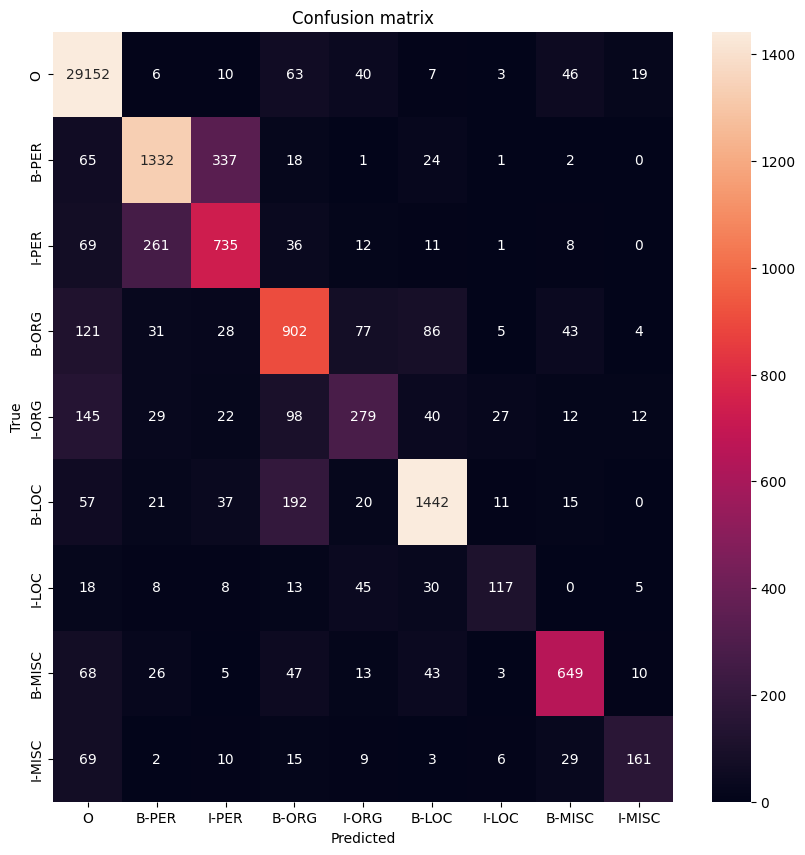

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


model.eval()
val_preds = []
val_labels = []
for batch in val_loader:
    input_ids = batch["input_ids"]
    labels = batch["labels"]
    with torch.no_grad():
        outputs = model(input_ids.to(device)).to("cpu")

    # outpus shape: (batch_size, seq_len, num_tags)
    # Contains log probabilities for each tag. We need to take the tag with the highest probability.
    # preds shape: (batch_size, seq_len)
    preds = torch.argmax(outputs, dim=-1)

    assert preds.shape == input_ids.shape
    assert preds.shape == labels.shape
    # Remove unknown words and padding
    flat_inputs = input_ids.view(-1)
    flat_preds = preds.view(-1)
    flat_labels = labels.view(-1)
    flat_preds = [pred for pred, input_id in zip(flat_preds, flat_inputs) if input_id != 0]
    flat_labels = [label for label, input_id in zip(flat_labels, flat_inputs) if input_id != 0]

    val_preds.extend(flat_preds)
    val_labels.extend(flat_labels)

# Confusion Matrix and Classification Report
print(classification_report(val_labels, val_preds, target_names=dataset["train"].features["ner_tags"].feature.names))
conf_mat = confusion_matrix(val_labels, val_preds)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf_mat,
    xticklabels=dataset["train"].features["ner_tags"].feature.names,
    yticklabels=dataset["train"].features["ner_tags"].feature.names,
    annot=True,
    fmt="d",
    vmax=conf_mat.reshape(-1)[1:].max(),
)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Confusion matrix")
plt.show()